<a href="https://colab.research.google.com/github/skolix15/Machine_Learning_2025/blob/main/Exercise_four_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Part 1

## Question 1

In [92]:
df = pd.read_csv('wine-missing.csv')
df.describe(include='all')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,NaN,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,NaN,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,NaN,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,NaN,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,NaN,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000


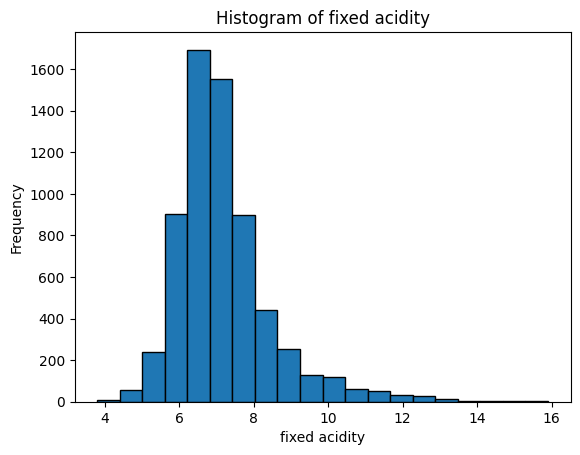

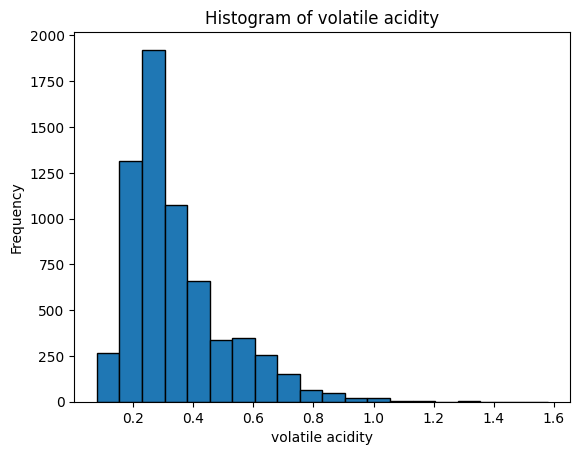

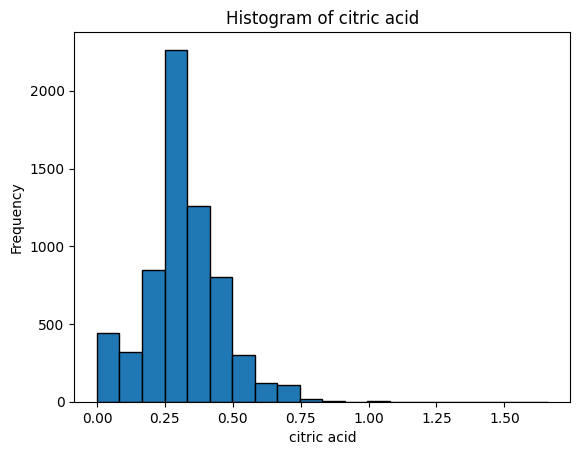

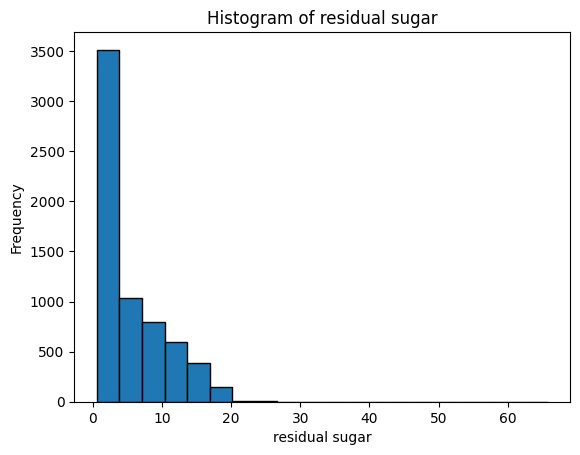

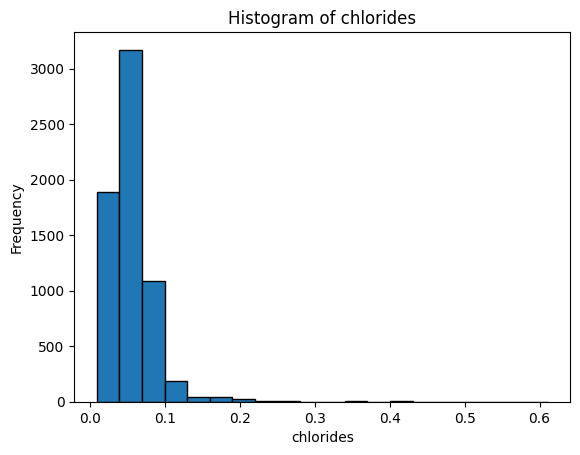

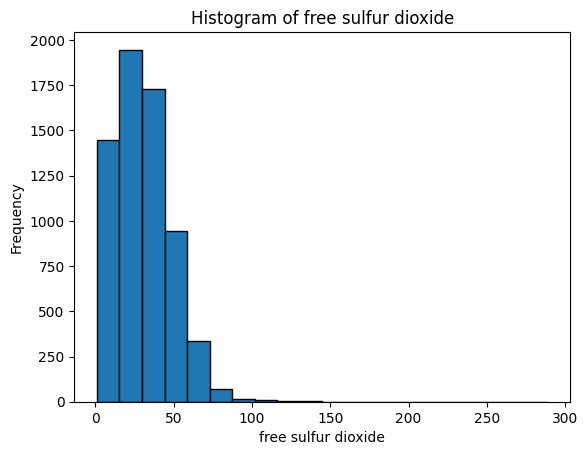

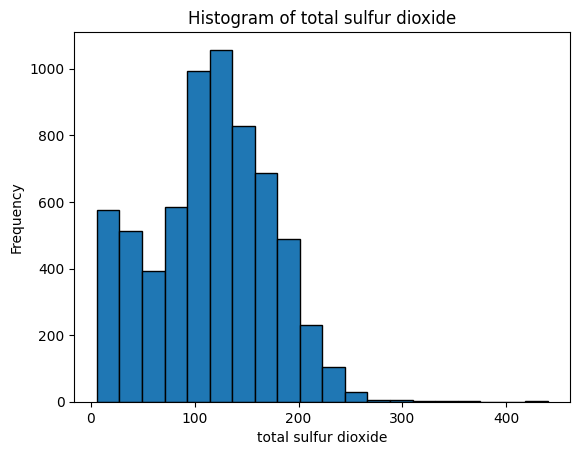

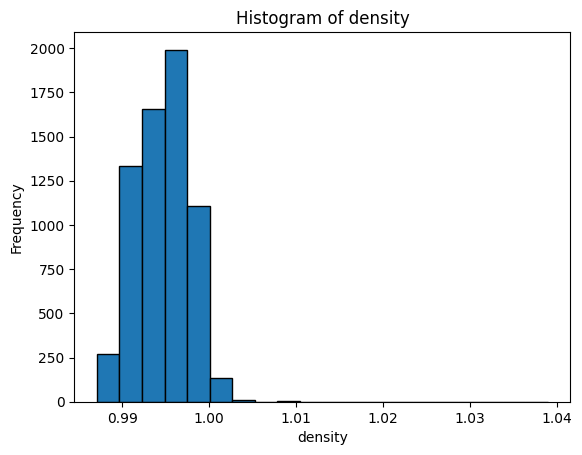

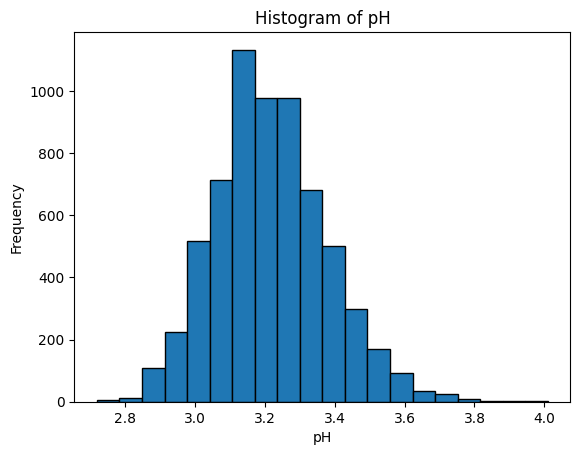

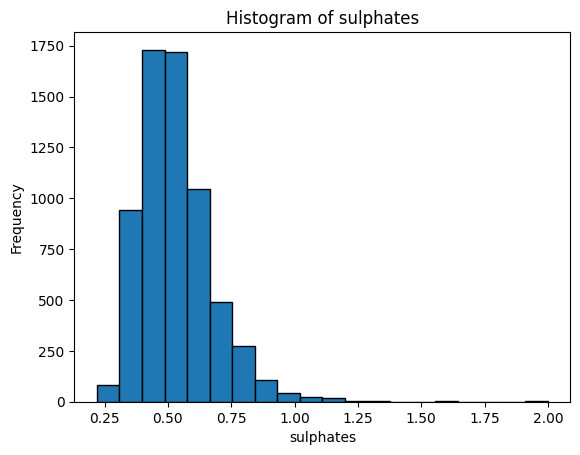

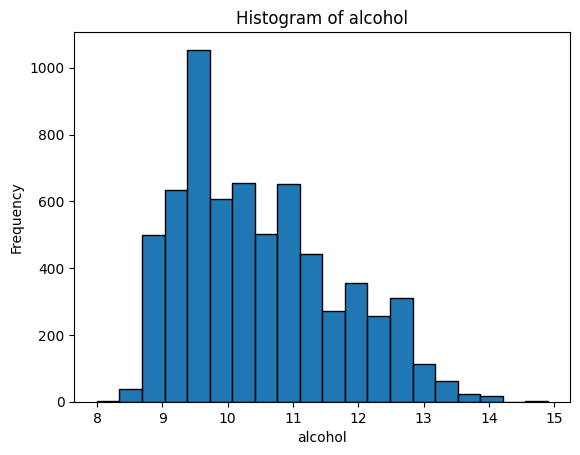

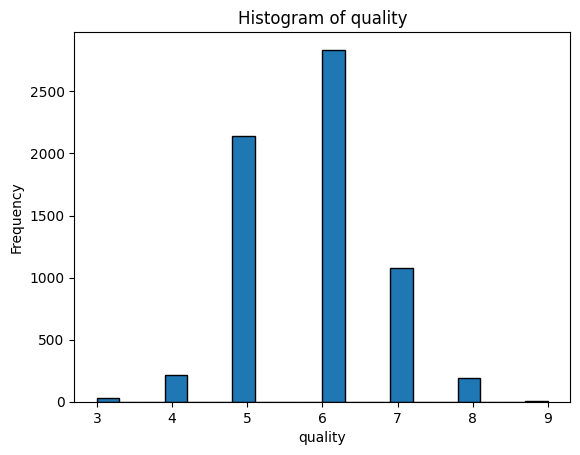

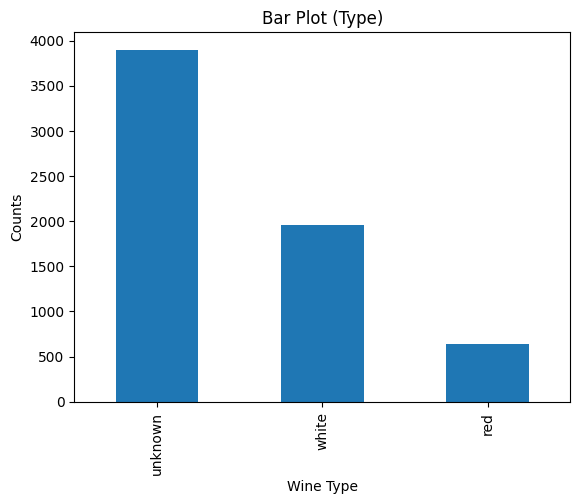

In [93]:
# Select the desired attributes to create histograms
desired_hist_attrs = df.select_dtypes(include='number').columns

# Create histograms for every desired attribute
for attr in desired_hist_attrs:
  plt.figure()
  plt.hist(df[attr].dropna(), bins=20, edgecolor='black')
  plt.title(f'Histogram of {attr}')
  plt.xlabel(attr)
  plt.ylabel('Frequency')
  plt.show()


# Fill NaN values with Unknown value
df['type'] = df['type'].fillna('unknown')
# Count frequencies
type_counts = df['type'].value_counts()
# Create bar plot for attribute 'Type'
plt.figure()
type_counts.plot(kind='bar')
plt.title('Bar Plot (Type)')
plt.xlabel('Wine Type')
plt.ylabel('Counts')
plt.show()



## Question 2

In [94]:
mapping_values = {"white": 0, "red": 1, "unknown": 2}
df['type'] = df['type'].map(mapping_values)

x = df.drop(columns=['type']).to_numpy()
y = df['type'].to_numpy()

x.shape, y.shape


((6497, 12), (6497,))

## Question 3

In [95]:
# Set mask for known and unknown types
mask_known = y != 2 # white: 0, red: 1
mask_unknown = y == 2 # unkwown: 2

# Create known variables
x_known = x[mask_known]
y_known = y[mask_known]
# Create unknown variables
x_unknown = x[mask_unknown]

x_known.shape, y_known.shape, x_unknown.shape

((2599, 12), (2599,), (3898, 12))

## Question 4

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x_known, y_known, test_size=0.3, random_state=42, stratify=y_known)

# Print results
print("X train:", x_train.shape)
print("X test:", x_test.shape)
print("Y train:", y_train.shape)
print("Y test:", y_test.shape)

X train: (1819, 12)
X test: (780, 12)
Y train: (1819,)
Y test: (780,)


## Question 5

In [97]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)

# Predictions
y_pred_train = rf_classifier.predict(x_train)
y_pred_test = rf_classifier.predict(x_test)

# Create method for calculating desired scores
def calculate_scores(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0)
    }

# Calculate train desired scores
train_desired_scores = calculate_scores(y_train, y_pred_train)

# Calculate test desired scores
test_desired_scores = calculate_scores(y_test, y_pred_test)

# Print results (Train)
print("Train scores:\n")
for metric, value in train_desired_scores.items():
    print(f"{metric.capitalize()} score: {value:.4f}")

# Print results (Test)
print("\nTest scores:\n")
for metric, value in test_desired_scores.items():
    print(f"{metric.capitalize()} score: {value:.4f}")

Train scores:

Accuracy score: 0.9995
Precision score: 0.9978
Recall score: 1.0000
F1 score: 0.9989

Test scores:

Accuracy score: 0.9987
Precision score: 0.9948
Recall score: 1.0000
F1 score: 0.9974


Αν το dataset είναι ισορροπημένο, το accuracy είναι αντιπροσωπευτικό.
Αν όμως δεν υπάρχει ισορροπία στο dataset, το F1-score είναι πιο κατάλληλο διότι συνδυάζει precision και recall, αποτυπώνοντας καλύτερα την απόδοση του μοντέλου στις λιγότερο συχνές κλάσεις.

## Question 6

In [98]:
rf_classifier_balanced = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_classifier_balanced.fit(x_train, y_train)

# Predictions
y_pred_train = rf_classifier_balanced.predict(x_train)
y_pred_test = rf_classifier_balanced.predict(x_test)

# Calculate train desired scores
balanced_train_desired_scores = calculate_scores(y_train, y_pred_train)

# Calculate test desired scores
balanced_test_desired_scores = calculate_scores(y_test, y_pred_test)

# Print results (Train)
print("Train scores:\n")
for metric, value in balanced_train_desired_scores.items():
    print(f"{metric.capitalize()} score: {value:.4f}")

# Print results (Test)
print("\nTest scores:\n")
for metric, value in balanced_test_desired_scores.items():
    print(f"{metric.capitalize()} score: {value:.4f}")

Train scores:

Accuracy score: 0.9995
Precision score: 0.9978
Recall score: 1.0000
F1 score: 0.9989

Test scores:

Accuracy score: 0.9949
Precision score: 0.9947
Recall score: 0.9844
F1 score: 0.9895


Η παράμετρος class_weight καθορίζει το βάρος (σημαντικότητα) που δίνεται σε κάθε κλάση κατά την εκπαίδεσυη του μοντέλου.

Δίνοντας τιμή 'balanced', το Random Forest υπολογίζει αυτόματα τα βάρη των κλάσεων με τέτοιο τρόπο ώστε να αντισταθμιστεί η ανισορροπία στο πλήθος των δειγμάτων της κάθε κλάσης.

Κατά αυτό τον τρόπο, οι λιγότερο συχνές κλάσεις, παίρνουν μεγαλύτερο βάρος και το μοντέλο σταματάει να "ευνοεί" τις συχνότερες κλάσεις.

**Source:** https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

**Specific text in source:**

"The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))"

## Question 7

In [99]:
# Prediction
y_unknown_proba = rf_classifier_balanced.predict_proba(x_unknown)
y_unknown_proba

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.01, 0.99],
       [0.01, 0.99],
       [0.01, 0.99]])

## Question 8

In [100]:
# y_unknown_proba has two columns (one for probability to be white, and one for probability to be red)
# So we keep the second column, the probability to be red
y_unknown_proba_class1 = y_unknown_proba[:, 1]

# Create labels with list comprehension
# For every 'red' probability we check the number
# if it is less than 0.35, we set the label "white"
# if it is more than 0.65 to set the label "red"
# otherwise we set the label "uncertain"
y_unknown_pred = [
    'red' if p > 0.65 else
    'white' if p < 0.35 else
    'uncertain'
    for p in y_unknown_proba_class1
]

# Print results
print("Predicted labels for x_unknown:\n")
print(np.array(y_unknown_pred).reshape(-1, 1))

Predicted labels for x_unknown:

[['white']
 ['white']
 ['white']
 ...
 ['red']
 ['red']
 ['red']]


## Question 9

In [101]:
# Select predictions with values red and white
mask_certain = np.isin(y_unknown_pred, ['red', 'white'])
x_updated = x_unknown[mask_certain] # Keep data that have labels red or white
y_new_labels = np.array(y_unknown_pred)[mask_certain] # y new labels will only have red and white now (not unknown)

# Convert red and white to 0 and 1 respectively
y_updated = np.where(y_new_labels == "red", 1, 0)

# Concatenate with initial train set
x_train_extended = np.concatenate([x_train, x_updated])
y_train_extended = np.concatenate([y_train, y_updated])

print(f"Sample added: {len(y_new_labels)}\n")
print("Previous training set shapes:\n")
print(f"x_train_extended: {x_train.shape}")
print(f"y_train_extended: {y_train.shape}\n")
print("New training set shapes:\n")
print(f"x_train_extended: {x_train_extended.shape}")
print(f"y_train_extended: {y_train_extended.shape}\n")

# Create new classifier
rf_classifier_updated = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_classifier_updated.fit(x_train_extended, y_train_extended)

# Predictions in the initial train/test data
y_updated_pred_train = rf_classifier_balanced.predict(x_train)
y_updated_pred_test = rf_classifier_balanced.predict(x_test)

# Calculate train desired scores
updated_train_desired_scores = calculate_scores(y_train, y_updated_pred_train)

# Calculate test desired scores
updated_test_desired_scores = calculate_scores(y_test, y_updated_pred_test)

# Print results (Train)
print("Updated train scores:\n")
for metric, value in updated_train_desired_scores.items():
    print(f"{metric.capitalize()} score: {value:.4f}")

# Print results (Test)
print("\nUpdated test scores:\n")
for metric, value in updated_test_desired_scores.items():
    print(f"{metric.capitalize()} score: {value:.4f}")

Sample added: 3847

Previous training set shapes:

x_train_extended: (1819, 12)
y_train_extended: (1819,)

New training set shapes:

x_train_extended: (5666, 12)
y_train_extended: (5666,)

Updated train scores:

Accuracy score: 0.9995
Precision score: 0.9978
Recall score: 1.0000
F1 score: 0.9989

Updated test scores:

Accuracy score: 0.9949
Precision score: 0.9947
Recall score: 0.9844
F1 score: 0.9895


## Question 10

In [102]:
from typing_extensions import final
POS_THRESHOLD = 0.65   # over this -> 'red'
NEG_THRESHOLD = 0.35   # lower this -> 'white'
MAX_ITER = 10          # Max iterations

x_train_final = x_train.copy()
x_test_final = x_test.copy()
y_train_final = y_train.copy()
y_test_final = y_test.copy()
x_unknown_final = x_unknown.copy()

# Create random forest classifier
rf_final = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_final.fit(x_train_final, y_train_final)


for i in range(MAX_ITER):

  # Calculate probability for unknown
  # Proba is an array with shape (n_sample, 2), we have 2 classes, white=0 / red=1
  # proba[i, 0] -> probability of sample i to be white
  # proba[i, 1] -> probability of sample i to be red
  proba = rf_final.predict_proba(x_unknown_final)
  # Get probability to be red
  # For every sample we keep the probability to be red (n_samples,)
  proba_red = proba[:, 1]

  # Create a boolean mask that includes samples with "sure" prediction
  # True -> Sample can be added in training set with pseudo label
  # False -> Sample is uncertain, will stay for the next iteration
  mask_add = (proba_red > POS_THRESHOLD) | (proba_red < NEG_THRESHOLD)
  if not np.any(mask_add):
      print(f"\nStopped at iteration {i}: no confident predictions.\n")
      break

  # Update x_new_final and y_new_final sets according to mask_add results
  # From x_unknown_final set is going to be kept only those that are "sure" (inside mask_add -> True)
  x_new_final = x_unknown_final[mask_add]
  y_new_final = np.where(proba_red[mask_add] > POS_THRESHOLD, 1, 0)

  # Update sets
  x_train_final = np.concatenate([x_train_final, x_new_final])
  y_train_final = np.concatenate([y_train_final, y_new_final])

  # Remove new samples from unknown set
  # Keep only samples with value False
  # So, keep only the samples taht should not be in the training set yet
  x_unknown_final = x_unknown_final[~mask_add]

  rf_final.fit(x_train_final, y_train_final)
  print(f"Iter {i+1}: added {len(y_new_final)} samples, remaining unknown {len(x_unknown_final)}")

# Final evaluation
y_pred_train_final = rf_final.predict(x_train_final)
y_pred_test_final = rf_final.predict(x_test_final)

final_train_desired_scores = calculate_scores(y_train_final, y_pred_train_final)
final_test_desired_scores = calculate_scores(y_test_final, y_pred_test_final)

# Print results (Train)
print("Final train scores:\n")
for metric, value in final_train_desired_scores.items():
    print(f"{metric.capitalize()} score: {value:.4f}")

# Print results (Test)
print("\nFinal test scores:\n")
for metric, value in final_test_desired_scores.items():
    print(f"{metric.capitalize()} score: {value:.4f}")


Iter 1: added 3847 samples, remaining unknown 51
Iter 2: added 23 samples, remaining unknown 28
Iter 3: added 2 samples, remaining unknown 26
Iter 4: added 5 samples, remaining unknown 21
Iter 5: added 1 samples, remaining unknown 20

Stopped at iteration 5: no confident predictions.

Final train scores:

Accuracy score: 0.9998
Precision score: 0.9993
Recall score: 1.0000
F1 score: 0.9996

Final test scores:

Accuracy score: 0.9962
Precision score: 0.9948
Recall score: 0.9896
F1 score: 0.9922


# Part 2

## Question 1

In [103]:
df_full = pd.read_csv('wine-full.csv')
df_full.describe(include='all')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,NaN,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,NaN,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,NaN,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,NaN,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,NaN,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000


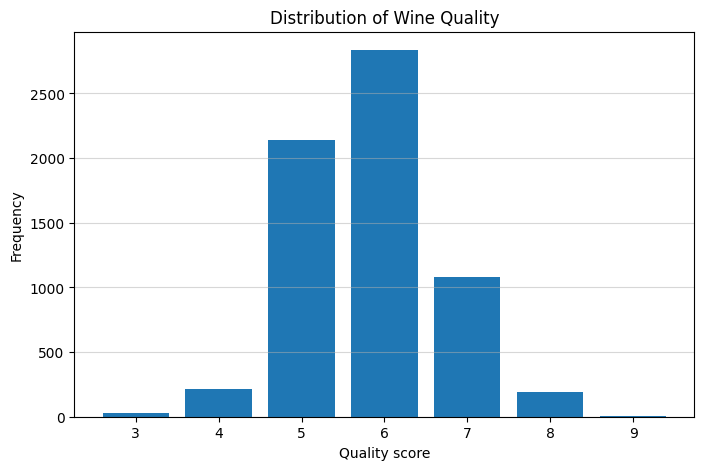

In [104]:
# Calculate quality frequencies
quality_counts = df_full["quality"].value_counts().sort_index()

# Create plot
plt.figure(figsize=(8,5))
plt.bar(quality_counts.index, quality_counts.values)
plt.xlabel("Quality score")
plt.ylabel("Frequency")
plt.title("Distribution of Wine Quality")
plt.grid(axis="y", alpha=0.5)

plt.show()

Το dataset δεν είναι ισορροπημένο (balanced) ως προς το χαρακτηριστικό quality, καθώς οι τιμές του εμφανίζουν σημαντική ανισορροπία στην κατανομή τους. Όπως φαίνεται και από το γράφημα συχνοτήτων, οι τιμές 5 και 6 συγκεντρώνουν τη μεγάλη πλειονότητα των δειγμάτων. Αντίθετα, οι τιμές 3, 4, 8 και 9 εμφανίζονται πολύ σπάνια.

## Question 2

Red wine quality mean: 5.6360225140712945
White wine quality mean: 5.87790935075541




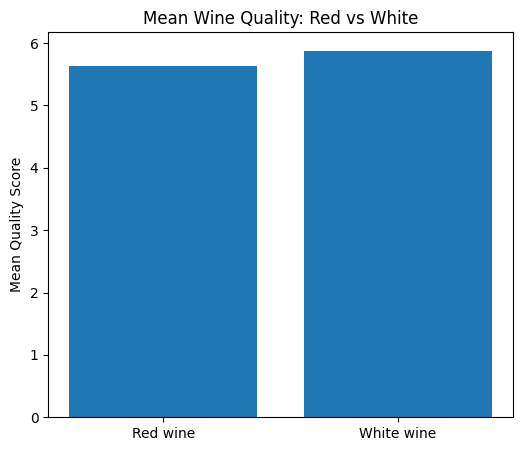

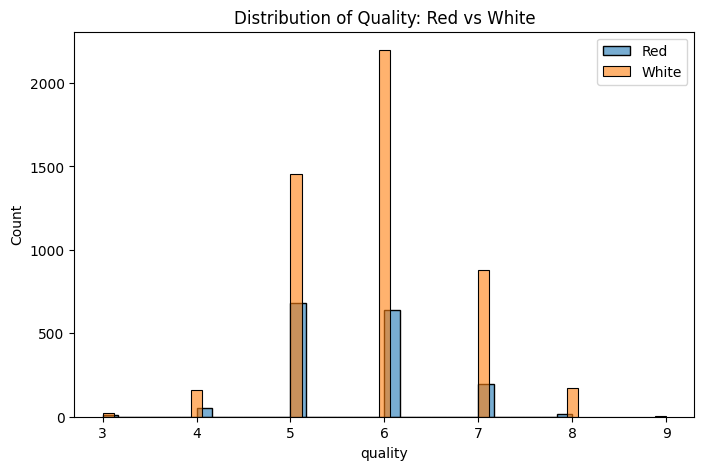

In [105]:
# Separate dataset into two subsets
red_wine = df_full[df_full['type'] == "red"]
white_wine = df_full[df_full['type'] == 'white']

# Calculte mean of both subsets
red_wine_mean = red_wine['quality'].mean()
white_wine_mean = white_wine['quality'].mean()
# Print results
print("Red wine quality mean:", red_wine_mean)
print("White wine quality mean:", white_wine_mean)
print("\n")

# Create plot with means
plt.figure(figsize=(6,5))
plt.bar(x=["Red wine", "White wine"], height=[red_wine_mean, white_wine_mean])
plt.ylabel("Mean Quality Score")
plt.title("Mean Wine Quality: Red vs White")
plt.show()
print("\n")

# Create histogram
plt.figure(figsize=(8,5))
sns.histplot(red_wine["quality"], label="Red", alpha=0.6)
sns.histplot(white_wine["quality"], label="White", alpha=0.6)
plt.legend()
plt.title("Distribution of Quality: Red vs White")
plt.show()






Από την ανάλυση των δεδομένων προκύπτει ότι το λευκό κρασί εμφανίζει συνολικά υψηλότερη ποιότητα σε σχέση με το κόκκινο. Στο γράφημα των μέσων τιμών (bar plot) παρατηρούμε ότι ο μέσος όρος του quality είναι μεγαλύτερος για το white wine, γεγονός που υποδηλώνει καλύτερη συνολική αξιολόγηση. Επιπλέον στο histogram, οι κατανομές δείχνουν ότι το λευκό κρασί συγκεντρώνει περισσότερες παρατηρήσεις στις υψηλότερες βαθμολογίες quality, ενώ το κόκκινο τείνει να συγκεντρώνεται σε χαμηλότερες τιμές. Συνεπώς, βάσει των διαθέσιμων δεδομένων, το λευκό κρασί μπορεί να θεωρηθεί ποιοτικά ανώτερο.

## Question 3

sugar_type
dry      5.818593
sweet    5.818120
Name: quality, dtype: float64 



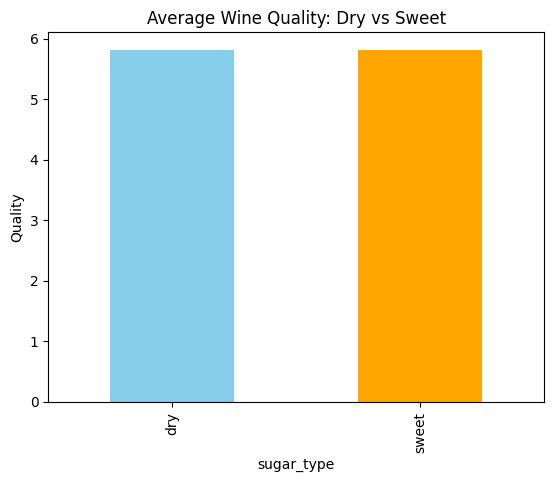

In [106]:
# Categorize wines based on residual sugar
# If value < 4 => dry
# Else => sweet
df_full['sugar_type'] = ['dry' if x < 4 else 'sweet' for x in df_full['residual sugar']]

# Calculate means for each catecory
quality_by_sugar = df_full.groupby('sugar_type')['quality'].mean()
print(quality_by_sugar, "\n")

# Create bar plot
quality_by_sugar.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average Wine Quality: Dry vs Sweet')
plt.ylabel('Quality')
plt.show()

Από το διάγραμμα βλέπουμε ότι οι μπάρες για το ξηρό και το γλυκό κρασί έχουν σχεδόν το ίδιο ύψος. Αυτό σημαίνει ότι η μέση ποιότητα είναι ίδια και για τα δύο είδη. Δηλαδή, το να έχει ένα κρασί περισσότερα σάκχαρα δεν φαίνεται να το κάνει πιο ποιοτικό.

## Quesstion 4

In [107]:
# Create numpy arrays (x, y)
x = df_full.drop(columns=['quality','type', 'sugar_type']).to_numpy()
y = df_full['quality'].to_numpy()

# Split data to train and test for x and y respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5847, 11) (650, 11) (5847,) (650,)


## Question 5

In [108]:
# Create model
model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.43846153846153846


## Question 6

In [109]:
# Initialize mae list
mae_list = []

for seed in range(10):

  # Split data to train and test for x and y respectively
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=seed)

  # Create model
  model = DecisionTreeRegressor(random_state=0)
  model.fit(x_train, y_train)

  # Make predictions
  y_pred = model.predict(x_test)

  # Calculate MAE
  mae = mean_absolute_error(y_test, y_pred)
  mae_list.append(mae)

# Calculate mean and standard deviation of mae
mae_mean = np.mean(mae_list)
mae_standrad_deviation = np.std(mae_list)

# Print results
print(f"Mean MAE: {mae_mean:.3f}")
print(f"Standard deviation MAE: {mae_standrad_deviation:.3f}")



Mean MAE: 0.462
Standard deviation MAE: 0.026


Ο μέσος MAE δείχνει πόσο περίπου θα είναι το σφάλμα του μοντέλου σε νέα δεδομένα, ενώ η τυπική απόκλιση δείχνει πόσο σταθερό είναι το σφάλμα ανάλογα με το ποια δεδομένα επιλέγονται για train και test. Αν η τυπική απόκλιση είναι μικρή, μπορούμε να έχουμε μεγαλύτερη σιγουριά ότι το αναμενόμενο σφάλμα που βρίσκουμε είναι αξιόπιστο.

## Question  7

In [110]:
# Create numpy arrays (x, y)
x = df_full.drop(columns=['quality','type', 'sugar_type']).to_numpy()
y = df_full['quality'].to_numpy()

# Split data to train and test for x and y respectively
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# Split data to train and validation
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=0)

# Set a list with parameters
params = [
    {"max_depth": d, "min_samples_split": s}
    for d in [3, 5, 7, 9, None]
    for s in [2, 5, 10]
][:15] # For keepin only 15

# Initialize results list
results = []

for p in params:

  # Create model
  model = DecisionTreeRegressor(
      random_state=0,
      max_depth=p["max_depth"],
      min_samples_split=p["min_samples_split"]
  )
  model.fit(x_train, y_train)

  # Make predictions
  y_train_pred = model.predict(x_train)
  y_val_pred = model.predict(x_val)

  # Calculate MAE for train and validation set
  mae_train = mean_absolute_error(y_train, y_train_pred)
  mae_val = mean_absolute_error(y_val, y_val_pred)

  results.append((p, mae_train, mae_val))

# Print results
for i, (p, tr, vl) in enumerate(results):
    print(f"{i+1}. Params: {p} | Train MAE: {tr:.3f} | Val MAE: {vl:.3f}")



1. Params: {'max_depth': 3, 'min_samples_split': 2} | Train MAE: 0.584 | Val MAE: 0.590
2. Params: {'max_depth': 3, 'min_samples_split': 5} | Train MAE: 0.584 | Val MAE: 0.590
3. Params: {'max_depth': 3, 'min_samples_split': 10} | Train MAE: 0.584 | Val MAE: 0.590
4. Params: {'max_depth': 5, 'min_samples_split': 2} | Train MAE: 0.542 | Val MAE: 0.569
5. Params: {'max_depth': 5, 'min_samples_split': 5} | Train MAE: 0.542 | Val MAE: 0.569
6. Params: {'max_depth': 5, 'min_samples_split': 10} | Train MAE: 0.542 | Val MAE: 0.569
7. Params: {'max_depth': 7, 'min_samples_split': 2} | Train MAE: 0.487 | Val MAE: 0.546
8. Params: {'max_depth': 7, 'min_samples_split': 5} | Train MAE: 0.487 | Val MAE: 0.548
9. Params: {'max_depth': 7, 'min_samples_split': 10} | Train MAE: 0.490 | Val MAE: 0.547
10. Params: {'max_depth': 9, 'min_samples_split': 2} | Train MAE: 0.401 | Val MAE: 0.545
11. Params: {'max_depth': 9, 'min_samples_split': 5} | Train MAE: 0.407 | Val MAE: 0.546
12. Params: {'max_depth': 9

## Question 8

Το training set δείχνει πόσο καλά το μοντέλο “μαθαίνει” τα δεδομένα που έχει ήδη δει, αλλά δεν μας λέει αν μπορεί να γενικεύσει σε νέα δεδομένα. Αν χρησιμοποιούσαμε το training MAE, τότε θα επιλέγαμε υπερπαραμέτρους που απλώς κάνουν το μοντέλο να αποστηθίζει (overfitting). Αντίθετα, το validation set αποτελείται από δεδομένα που το μοντέλο δεν έχει δει στην εκπαίδευση, άρα το validation MAE δείχνει καλύτερα ποιο μοντέλο θα έχει την καλύτερη απόδοση σε πραγματικές συνθήκες. Για αυτό χρησιμοποιούμε το validation set για επιλογή υπερπαραμέτρων.

## Question 9

In [111]:
# Create numpy arrays (x, y)
x = df_full.drop(columns=['quality','type', 'sugar_type']).to_numpy()
y = df_full['quality'].to_numpy()

# Split data to train and test for x and y respectively
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# Create grid
grid = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=0),  # Decision Tree Regressor model
    param_grid={
        "max_depth": [3, 5, 7, 9, None],    # The combination of parameters
        "min_samples_split": [2, 5, 10]
    },
    scoring="neg_mean_absolute_error",  # MAE (but it is given as negative in sklearn)
    cv=10,  # Κ=10 folds
    n_jobs=-1 # will use all the cores of the cpu
)

# Train with cross-validation
# In this step x_train set is separated to 10 folds
# Each fold has 9/10 train and 1/10 validation data
# This is happening 10 times
grid.fit(x_train, y_train)

# Print results (Best hyperparameters)
print("Best parameters:", grid.best_params_)
print("Best CV MAE:", -grid.best_score_)  # Put minus in front of variable because sklearn gives negative MAE


Best parameters: {'max_depth': None, 'min_samples_split': 2}
Best CV MAE: 0.5287468657918336


## Question 10

In [112]:
# Get best estimator (best model)
best_model = grid.best_estimator_
# Make prediction with best model
y_pred = best_model.predict(x_test)
# Get MAE
mae_test = mean_absolute_error(y_test, y_pred)

# Print result
print("Test MAE with best model:", mae_test)

# Notes for me:
# GridSearchCV separates train set into 10 different train-validation splits
# Calcultates MAE for each split and gives as a result
# the mean MAE of all folds
# and the best hyperparameters
# Finally, the final model is training with these parameters in the whole train set
# and calculates the test MAE

Test MAE with best model: 0.48615384615384616


Η πιο αξιόπιστη μέθοδος είναι αυτή του ερωτήματος 9 (cross-validation).

Στο ερώτημα 6, το αποτέλεσμα εξαρτάται από ένα μόνο train-test split, επομένως μπορεί να επηρεαστεί από τύχη.

Στο ερώτημα 7, το αποτέλεσμα εξαρτάται από ένα σταθερό validation set. Είναι καλύτερο από το ερώτημα 6, αλλά η αξιολόγηση πάλι γίνεται σε ένα μόνο split. Ενδέχεται, επομένως, να μην αντιπροσωπεύει το γενικό dataset.

Τέλος, στο ερώτημα 9, χρησιμοποιούνται 10 διαφορετικά splits του train set, υπολογίζεται ο μέσος όρος του MAE και επιλέγεται το πιο σταθερό μοντέλο.
Η πιθανότητα λάθος λόγω τυχαίας διαίρεσης του set μειώνεται δραστικά.

Εν κατακλείδι, το cross-validation method είναι πιο αξιόπιστο, διότι χρησιμοποιεί περισσότερα spl;its και δίνει πιο σταθερή και γενικευμένη εκτίμηση του σφάλματος.

## Question 11

Best parameters: {'max_depth': 5, 'min_samples_split': 2}
Best CV MAE: 0.5709651178185846




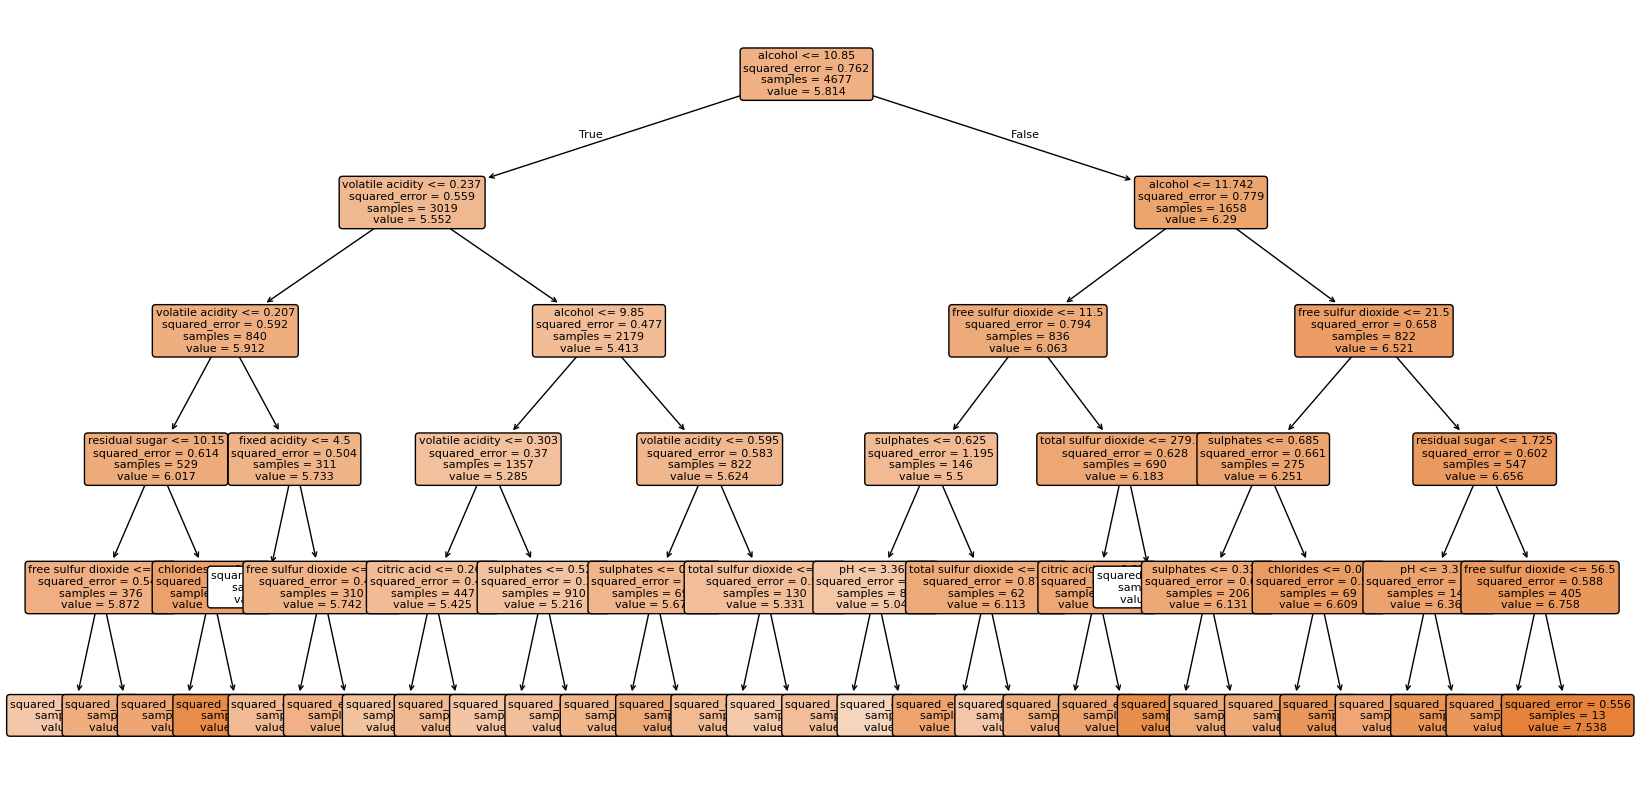



|--- alcohol <= 10.85
|   |--- volatile acidity <= 0.24
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- residual sugar <= 10.15
|   |   |   |   |--- free sulfur dioxide <= 8.50
|   |   |   |   |   |--- value: [5.00]
|   |   |   |   |--- free sulfur dioxide >  8.50
|   |   |   |   |   |--- value: [5.91]
|   |   |   |--- residual sugar >  10.15
|   |   |   |   |--- chlorides <= 0.06
|   |   |   |   |   |--- value: [6.20]
|   |   |   |   |--- chlorides >  0.06
|   |   |   |   |   |--- value: [7.14]
|   |   |--- volatile acidity >  0.21
|   |   |   |--- fixed acidity <= 4.50
|   |   |   |   |--- value: [3.00]
|   |   |   |--- fixed acidity >  4.50
|   |   |   |   |--- free sulfur dioxide <= 23.50
|   |   |   |   |   |--- value: [5.48]
|   |   |   |   |--- free sulfur dioxide >  23.50
|   |   |   |   |   |--- value: [5.80]
|   |--- volatile acidity >  0.24
|   |   |--- alcohol <= 9.85
|   |   |   |--- volatile acidity <= 0.30
|   |   |   |   |--- citric acid <= 0.27
|   |   |   |  

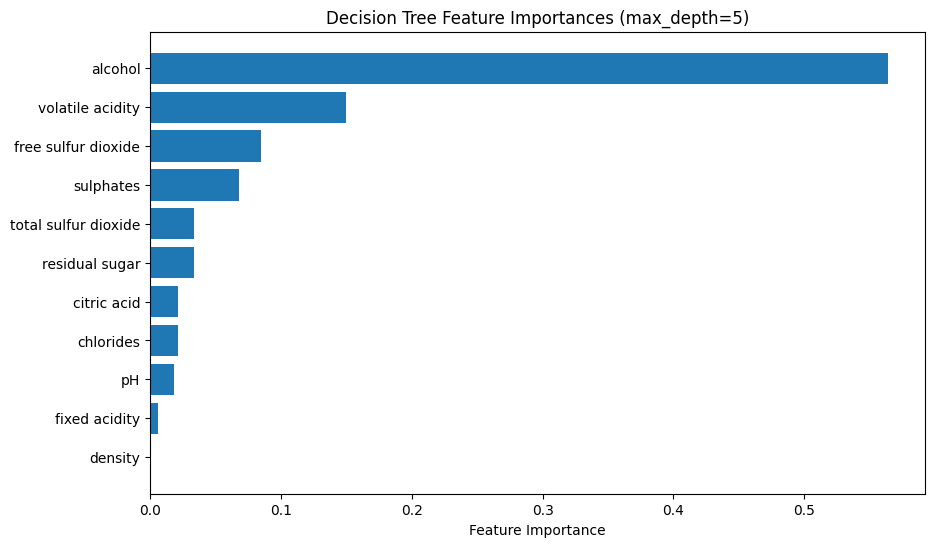

In [113]:
# ------------------
# Part 1 of question
# ------------------

# Create numpy arrays (x, y)
x = df_full.drop(columns=['quality','type', 'sugar_type']).to_numpy()
y = df_full['quality'].to_numpy()

# Split data to train and test for x and y respectively
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# Create grid
grid = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=0),
    param_grid={
        "max_depth": [5],    # Max depth only one value (5)
        "min_samples_split": [2, 5, 10]
    },
    scoring="neg_mean_absolute_error",
    cv=10,
    n_jobs=-1
)

# Train with cross-validation
grid.fit(x_train, y_train)

# Print results (Best hyperparameters)
print("Best parameters:", grid.best_params_)
print("Best CV MAE:", -grid.best_score_)
print("\n")

# ------------------
# Part 2 of question
# ------------------

# Get best model
best_model = grid.best_estimator_
# Get feature names
feature_names = df_full.drop(columns=['quality','type','sugar_type']).columns

# Create plot tree
plt.figure(figsize=(20,10))
plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()
print("\n")

# ------------------
# Part 3 of question
# ------------------

# Print rules
tree_rules = export_text(best_model, feature_names=feature_names)
print(tree_rules, "\n")

# ------------------
# Part 4 of question
# ------------------

# Get feature importances of best model
importances = best_model.feature_importances_

# Sort importances and feature names regaring importances
idx = np.argsort(importances)
sorted_features = feature_names[idx]
sorted_importances = importances[idx]

# Create bar plot
plt.figure(figsize=(10,6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importances (max_depth=5)")
plt.show()

Μετάφραση του αποτελέσματος export text (Συνοψίζοντας σε 8 κανόνες):

1. Τα κρασιά με υψηλή περιεκτικότητα σε αλκοόλ (πάνω από 11.7) τείνουν να έχουν υψηλότερη ποιότητα.

2. Η χαμηλή πτητική οξύτητα (volatile acidity) σχετίζεται με καλύτερη ποιότητα.

3. Υψηλές τιμές sulphates οδηγούν συχνά σε υψηλότερο σκορ ποιότητας.

4. Χαμηλά chlorides συνδέονται με καλύτερη ποιότητα, ειδικά όταν το κρασί έχει και υψηλή αλκοόλη.

5. Κρασιά με υψηλό residual sugar έχουν καλύτερη ποιότητα μόνο όταν τα chlorides είναι χαμηλά.

6. Πολύ υψηλές τιμές total sulfur dioxide μειώνουν αισθητά την ποιότητα.

7. Κρασιά με χαμηλή αλκοόλη και υψηλή πτητική οξύτητα προβλέπονται να έχουν χαμηλή ποιότητα.

8. Υψηλότερο citric acid μπορεί να αυξήσει την ποιότητα, ιδιαίτερα σε κρασιά με μέτρια αλκοόλη.